# Annual Water Usage in Baltimore

Data yang digunakan pada use case ini dapat diunduh pada [Link ini](https://drive.google.com/open?id=1axM3gfGxQq4T0wuwP51DVMQAecVFmpxL). <br>
Dataset tersebut dibuat oleh Hipel an Mcleod tahun 1994.

### Import Librarys

In [1]:
# Import Librarys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### No. 1 -- Load Dataset
- Load dataset sebagai pandas series
- Split data menjadi dua : satu set data digunakan untuk menentukan model development (dataset.csv) dan yang lainnya untuk validasi (validasi.csv)

In [2]:
# Load dataset water.csv
df = pd.read_csv('water.csv')
df.head()

,year,annual_water_usage
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [3]:
# Melihat tipe data dari water.csv
df.dtypes

year                  int64
annual_water_usage    int64
dtype: object

> **Tipe Data water.csv** <br>
Tipe data dari features year dan annual_water_usage adalah integer (numerik)

In [4]:
# Dimensi dari dataset annual water usage
df.shape

(79, 2)

> **Dimensi water.csv** <br>
Dari dimensi dataset di atas terlihat bahwa terdapat 79 tahun water usage.

In [5]:
# Split dataset water usage
# dataset.csv untuk model development
# validation.csv untuk model validation

# Menentukan batas untuk split dataset annual water usage
batas = len(df) - 19
dataset, validation = df[0:batas], df[batas:]

# Menyimpan dataset untuk model development pada file dataset.csv
dataset.to_csv('dataset.csv')

# Menyimpan dataset untuk model validation pada file validation.csv
validation.to_csv('validation.csv')

> **Split Dataset water.csv** <br>
Dataset water.csv displit menjadi dua kelompok yaitu data model development dan data model validation. Kedua data tersebut kemudian disimpan dalam bentuk .csv dengan nama dataset.csv untuk data model deployment dan validation.csv untuk data model validation.

In [6]:
# Load dataset untuk model development
dataset = pd.read_csv('dataset.csv')

# Dimensi dari dataset untuk model development
dataset.shape

(60, 3)

In [7]:
# Load dataset untuk model validation
validation = pd.read_csv('validation.csv')

# Load dataset untuk model validation
validation.shape

(19, 3)

> **Dimensi dataset.csv dan validation.csv** <br>
Dari split dataset annual water usage diatas didapat komposisi data untuk model development (dataset.csv) sebanyak 60 tahun penggunaan air (1885 sampai dengan 1945) dan data untuk validasi model (validation.csv) sebanyak 19 tahun (1946 sampai dengan 1965).

### No. 2 -- Create summary of the dataset, with python function.

In [8]:
# Menghapuskan kolom 'Unnamed: 0' pada dataset.csv
dataset = dataset.drop(columns = 'Unnamed: 0', axis = 0)

In [9]:
# Memunculkan 5 baris pertama dari dataset
dataset.head()

,year,annual_water_usage
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [10]:
# Melihat Statistika deskriptif dari dataset untuk model development
# dataset --> dataset.csv
dataset.describe().round(3)

,year,annual_water_usage
count,60.000,60.000
mean,1914.500,487.350
std,17.464,69.319
min,1885.000,344.000
25%,1899.750,454.000
50%,1914.500,486.500
75%,1929.250,515.000
max,1944.000,662.000


> **Summary dari dataset water.csv** <br>
Dari summary dataset di atas dapat dikatakan bahwa rata-rata penggunaan air (tahunan) berkisar pada jumlah 487.35 dengan detail:
- Minimum penggunaan air (tahunan) sejumlah 344
- Nilai tengah dari penggunaan air (tahunan) sejumlah 486.5
- Maksimum penggunaan air (tahunan) sejumlah 662

> Jika dilihat dari nilai minimum, nilai tengah, dan maksimumnya dapat dikatakan bahwa penggunaan air selama 79 tahun tidak naik secara signifikan. Dikarenakan selama 79 tahun range dari penggunaan air (tahunan) ada di angka 328.

### No. 3 -- Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

Text(0.5, 1.0, 'Annual Water Usage in Baltimore')

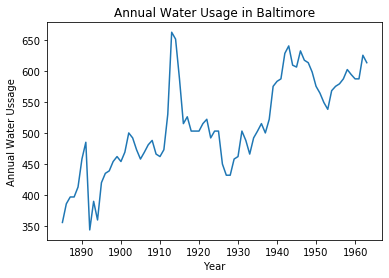

In [11]:
# Membuat line plot dari year dan annual_water_usage
plt.plot(df['year'], df['annual_water_usage'])
plt.xlabel('Year')
plt.ylabel('Annual Water Ussage')
plt.title('Annual Water Usage in Baltimore')

> **Penggunaan Air (tahunan)** <br>
Dari line plot di atas dapat dilihat bahwa trend dari penggunaan air (tahunan) selama 79 tahun adalah naik. Namun itu terdapat 2 peristiwa yang bisa dilihat dari line plot tersebut.
- Dari tahun 1953 sampai dengan 1890an penggunaan air terus meningkat. Namun pada tahun 1890an penggunaan air turun drastis.
- Dari tahun 1910an sampai dengan 1913an penggunaan air terus meningkat. Namun pada tahun 1913an sampai dengan 1917an penggunaan air turun drastis.

### No. 4 -- Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

In [12]:
# Mengubah tipe data dari features year dari integer menjadi datetime
df['year'] = pd.to_datetime(df['year'], format = '%Y')

In [13]:
# Membuat features year menjadi index dari dataset untuk model development
df = df.set_index(df['year'])

# Membuat partisi dengan mengelompokkan data berdasarkan tahun untuk setiap
# satuan dekade (10 tahun)
groups = df.loc['1885':'1943'].groupby(pd.Grouper(freq='10AS')).mean().round(3)
groups

,annual_water_usage
year,
1885-01-01,398.600
1895-01-01,459.800
1905-01-01,514.000
1915-01-01,516.900
1925-01-01,468.600
1935-01-01,561.444


> **Rata-rata Penggunaan Air (Dekade)** <br>
Dari hasil pembagian dataset water.csv didapat bahwa dataset untuk model development terdiri atas 60 tahun pertama penggunaan air (tahunan). Sehingga pada saat dikelompokkan dalam dekade akan menghasilkan 6 kelompok data. Penggunaan air per dekade di dapat dari rataan penggunaan air (tahunan) untuk setiap 10 tahun (dekade).

Text(0.5, 1.0, 'Decade Water Usage in Baltimore')

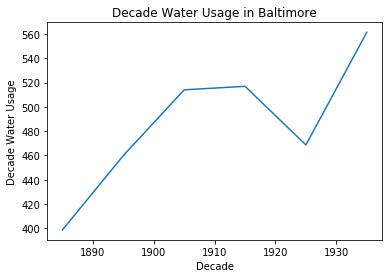

In [14]:
# Membuat line plot dari penggunaan air per dekade untuk dataset.csv
plt.plot(groups.index, groups['annual_water_usage'])
plt.xlabel('Decade')
plt.ylabel('Decade Water Usage')
plt.title('Decade Water Usage in Baltimore')

> **Penggunaan air per dekade** <br>
Dari line plot di atas dapat dilihat bahwa penggunaan air per dekade sebagai berikut:
- Dari tahun 1885 sampai dengan 1905an penggunaan air per dekade selalu naik.
- Pada tahun 1905an sampai dengan 1915an penggunaan air per dekade nyaris konstan (kenaikannya sangat minim).
- Dari tahun 1915an sampai dengan 1925an penggunaan air per dekade menurun.
- Dari tahun 1925an sampai dengan 1945 penggunaan air terus meningkat.

> **Perbedaan visualisai penggunaan air tahunan dan per dekade** <br>
- Line plot penggunaan air per tahun terlihat lebih detail, namun trend dari penggunaan air dari tahun ke tahun tidak dapat terlihat dengan jelas.
- Line plot penggunaan air per dekade tidak terlihat dengan detail, namun dapat memperjelas trend penggunaan air selama 79 tahun dari 1885 sampai dengan 1945.

### No. 5 -- Create models using ARIMA

### 5.1 - 5.3 : Split Dataset
5.1 -- Membagi dataset menjadi train dan test <br>
5.2 -- 50% dari dataset menjadi train model <br>
5.3 -- 50% sisanya akan menjadi test model <br>

In [18]:
# Menghapus feature year
# karena untuk time series nilai year tidak akan digunakan
df.drop(columns=['year'], inplace=True)

In [23]:
# Mengubah tipe data annual_water_usage menjadi floate
df = df.astype('float64')

# Memberikan partisi untuk split dataset water usage menjadi dua bagian
# Dari soal diminta untuk membagi train dataset dan test dataset dibagi sama banyak (50:50)
train_size = int(len(df)*0.5)

# Train dataset
train = df[0:train_size]

# Test dataset
test = df[train_size:]

# Dimensi dari train dan test
print(train.shape)
print(test.shape)

(39, 1)
(40, 1)


> **Dimensi dari train dataset dan test dataset** <br>
Pada soal diminta untuk split dataset annual water usage dengan proporsi 50:50. Sehingga dari code di atas didapat bahwa banyaknya data yang masuk kedalam train dataset sejumlah 39 tahun (1885 sampai dengan 1924) dan yang masuk kedalam test dataset sebanyak 40 tahun (19 25 sampai dengan 1945).

### 5.4 - 5.5 : Use an ARIMA(0,1,0) on the raw data may be a good starting point.
5.4 -- ARIMA (p,d,q) memiliki 3 parameter yang akan dicari secara manual <br>
5.5 -- Menggunakan ARIMA (0,1,0) untuk memodelkan time series dataset water.csv

In [24]:
# Memodelkan dataset water.csv untuk time series analysis
# Dengan menggunakan ARIMA(0,1,0)
arima_order = (0,1,0)
arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.annual_water_usage   No. Observations:                   38
Model:                   ARIMA(0, 1, 0)   Log Likelihood                -195.431
Method:                             css   S.D. of innovations             41.429
Date:                  Thu, 10 Oct 2019   AIC                            394.863
Time:                          21:49:45   BIC                            398.138
Sample:                      01-01-1886   HQIC                           396.028
                           - 01-01-1923                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5789      6.721      0.533      0.598      -9.593      16.751


### 5.6 - 5.8 : Prediction
5.6 -- Membuat dataframe untuk menyimpan nilai prediksi yang dihasilkan dari time series dengan dataset water.csv <br>
5.7 -- Memasukan nilai aktial dari masing-masing penggunaan air (tahunan) ke dalam dataframe <br>
5.8 -- Hasil prediksi yang diperoleh akan dicari nilai RMSE nya

In [30]:
# Menentukan nilai prediksi dari time series dengan model ARIMA (0,1,0)
y_pred = arima_fit.forecast(len(test))[0]

# Membuat dataframe baru yang berisikan index 'year' serta nilai prediksi dan juga actual dari annual water usage
df_test = pd.DataFrame(y_pred, columns=['prediksi'], index=test.index).round(3)
# Membulatkan hasil prediksi samai dengan 3 angka di belakang koma
df_test['actual'] = test.values.round(3)

# Memunculkan 5 baris pertama dari dataframe df_test
df_test.head()

,prediksi,actual
year,,
1924-01-01,495.579,503.0
1925-01-01,499.158,503.0
1926-01-01,502.737,450.0
1927-01-01,506.316,432.0
1928-01-01,509.895,432.0


### No. 6 -- Calculate RMSE using the helper function from the scikit-learn library, from dataset only
Nilai RMSE akan menunjukkan rata-rata seberapa banyak dari kesalahan model time series yang dibangun (antara nilai actual dan prediksinya).

In [34]:
# Menghitung nilai dari MSE model time series annual water usage
mse = mean_squared_error(df_test['actual'], df_test['prediksi'])

# Menentukan nilai RMSE
rmse = np.sqrt(mse)

#Menampilkan nilai RMSE nya
print('RMSE : ', rmse.round(3))

RMSE :  41.482


> **Akurasi model time series dari annual water usage per tahun** <br>
Dari informasi di atas di dapat bahwa nilai RMSE untuk model ARIMA (0,1,0) dari time series dengan menggunakan data annual water usage masih buruk. Hal ini tentunya didasari dengan nilai RMSE = 41.482 dari rata-rata penggunaan air secara actual sebesar 480an.